# Cargamos la librería

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE



# Cargamos la data

In [19]:
data = pd.read_csv('C:/Users/leo_2/Documents/tarjetas_creditos/data/procesada/data_procesada.csv')

In [ ]:
data.drop(columns=['Cliente','Negocio'], inplace=True)

In [21]:
data.isna().sum()

Fecha_Compra                 0
Genero                       0
Grupo_Edad                   0
Trabajo                      0
Tipo_Via                     0
Horario                      0
Tipo_Tarjeta                 0
Monto_Transaccion            0
Categoria_Compra             0
Distancia_Cliente_Negocio    0
Fraude                       0
dtype: int64

# Preprocesamiento

In [22]:
Oe_edad = OrdinalEncoder()
data['Grupo_Edad'] = Oe_edad.fit_transform(data[['Grupo_Edad']])

le_via = LabelEncoder()
data['Tipo_Via'] = le_via.fit_transform(data[['Tipo_Via']])

le_horaro = OrdinalEncoder()
data['Horario'] = le_horaro.fit_transform(data[['Horario']])

le_tarjeta = LabelEncoder()
data['Tipo_Tarjeta'] = le_tarjeta.fit_transform(data[['Tipo_Tarjeta']])

le_compra = LabelEncoder()
data['Categoria_Compra'] = le_compra.fit_transform(data[['Categoria_Compra']])

data['Genero'].replace({'F': 0, 'M': 1}, inplace=True)

le_trabajo = LabelEncoder()
data['Trabajo'] = le_trabajo.fit_transform(data[['Trabajo']])

c:\Users\leo_2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leo_2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\leo_2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leo_2\AppData\Local\Temp\ipykernel_13864\3352318514.py:16: FutureWarning: A value is trying to

In [24]:
data.drop(columns='Fecha_Compra', inplace=True)

# Partimos la data

In [25]:
X = data.drop('Fraude', axis=1)
y = data['Fraude']

# Reviamos desbalances

In [23]:
data['Fraude'].value_counts()

Fraude
0    1289169
1       7506
Name: count, dtype: int64

In [26]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled) 

# Creamos el modelo

In [28]:
clasificador = DecisionTreeClassifier(max_depth=3)

# Entrenamos el clasificador
clasificador.fit(X_train, y_train)

# Hacemos predicciones
predicciones = clasificador.predict(X_val)

In [29]:
from sklearn.metrics import accuracy_score, recall_score,f1_score, confusion_matrix, classification_report

# Hallamos el accuracy
print(accuracy_score(y_val, predicciones))
print(recall_score(y_val, predicciones) )
print(f1_score(y_val, predicciones) )



0.8814676626563345
0.9500789913923946
0.8890781576460881


In [30]:
print(classification_report(y_val, predicciones))



              precision    recall  f1-score   support

           0       0.94      0.81      0.87    386751
           1       0.84      0.95      0.89    386751

    accuracy                           0.88    773502
   macro avg       0.89      0.88      0.88    773502
weighted avg       0.89      0.88      0.88    773502



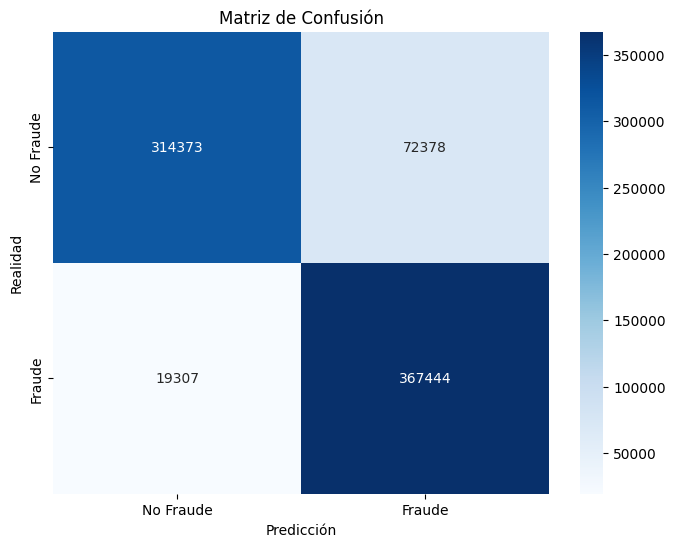

In [31]:
cm = confusion_matrix(y_val, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clasificador, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Prmedio cross-validation score:", np.mean(cross_val_scores))



Cross-validation scores: [0.8812453  0.88053942 0.88107852 0.88088049 0.88215263]
Prmedio cross-validation score: 0.8811792715596548


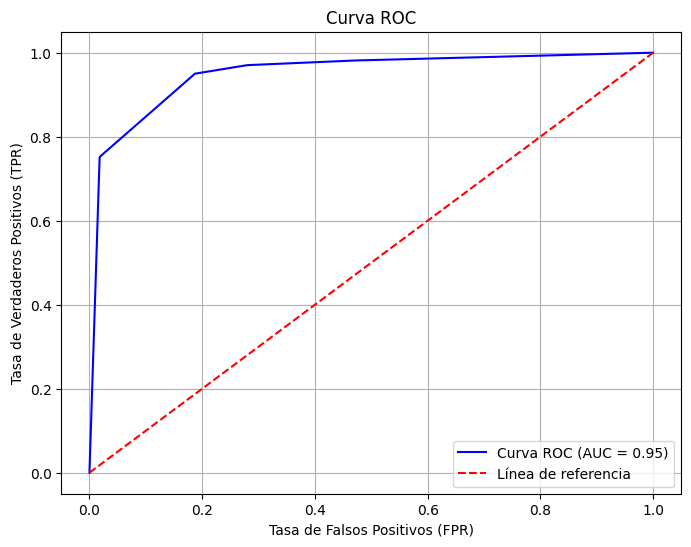

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
# Calcular las probabilidades de predicción
y_proba = clasificador.predict_proba(X_val)[:, 1]
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Línea de referencia')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

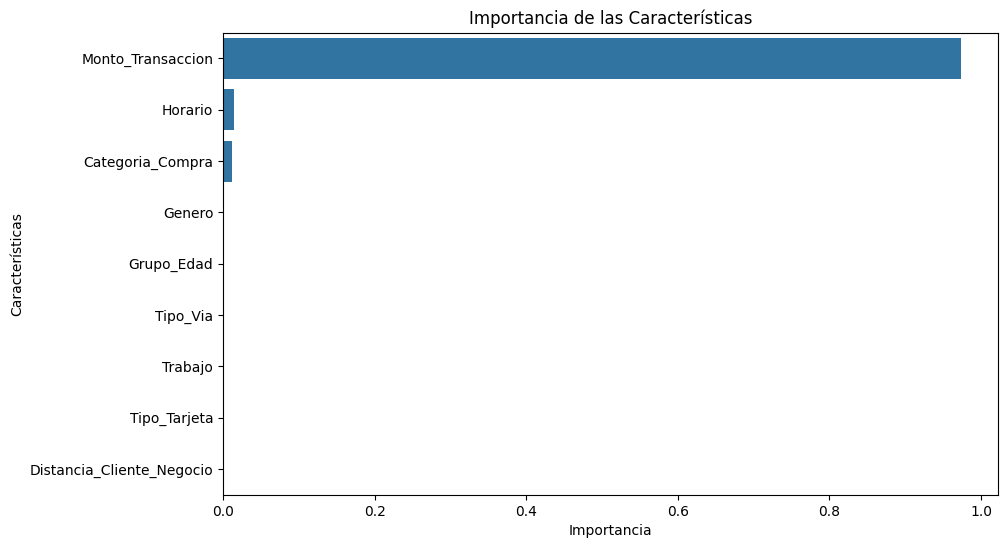

In [34]:
importances = clasificador.feature_importances_
feature_names = X.columns
# Crear un DataFrame para las importancias
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Graficar las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [36]:
from src.modelo import generador_features


ModuleNotFoundError: No module named 'src'